In [1]:
import numpy as np

In [2]:
def simple_roulette(bet):
    spin = np.random.randint(0, 37)
    if spin == 0 or spin % 2 == 0:
        return 0
    else: return bet*2
        

In [3]:
import sys
import time
bet= 10
n_games = 0
start_capital = 1000
capital = start_capital
while capital > 0:
    time.sleep(0.1)
    capital -= bet
    round_payout = simple_roulette(bet)
    n_games += 1
    sys.stdout.write(f"'\r after {n_games} games you have {capital + round_payout} money, betting {bet} last")
    if round_payout:
        capital += round_payout
        bet = 10
    bet *= 2
    if bet > capital:
        sys.stdout.write(f"\r Oi! after {n_games} games you do not have enough to recoup your losses")
        break
    if capital == 2*start_capital:
        sys.stdout.write(f"\r you win for the night, you doubled your winnings")
        break
    # if n_games >= 25:
    #     print(f"you dont want to play more than {n_games} games. Go home with {capital}")
    #     break

       
    

 Oi! after 175 games you do not have enough to recoup your losses'''''''''''''''''''''''''''''''''''''''''''''''

In [20]:
def game(start_capital=1000, min_bet = 10, win_limit = 1.1, print = False, max_rounds = 100):
    capital = start_capital
    bet = min_bet
    n_rounds = 0
    while capital >= 0 and n_rounds <= max_rounds:
        n_rounds+=1
        if capital >= start_capital * win_limit or bet > capital:
            break
        capital -= bet #bet money
        winnings = simple_roulette(bet)
        capital += winnings
        if winnings:
            bet = min_bet # reset bet amount
        else:
            bet *= 2 # double the bet to recoup losses
        if print:
            sys.stdout.write(f"\r {n_rounds=}, {capital=}, {bet=}")
            time.sleep(0.1)
    return capital-start_capital
    

In [21]:
game(win_limit = 2, print = True)

 n_rounds=57, capital=30, bet=12800

-970

In [22]:
game(print=True, win_limit = 2)

 n_rounds=24, capital=430, bet=640

-570

In [23]:
simulations = [np.vstack([[np.sum([game(win_limit = win_limit, max_rounds = 500) for _ in range(n_games)]) for n_games in range(1, 50)] for _ in range(50)]) for win_limit in [1.5, 2, 3]]

In [24]:
median = np.median(simulation, axis = 0)
err = np.std(simulation, axis = 0)

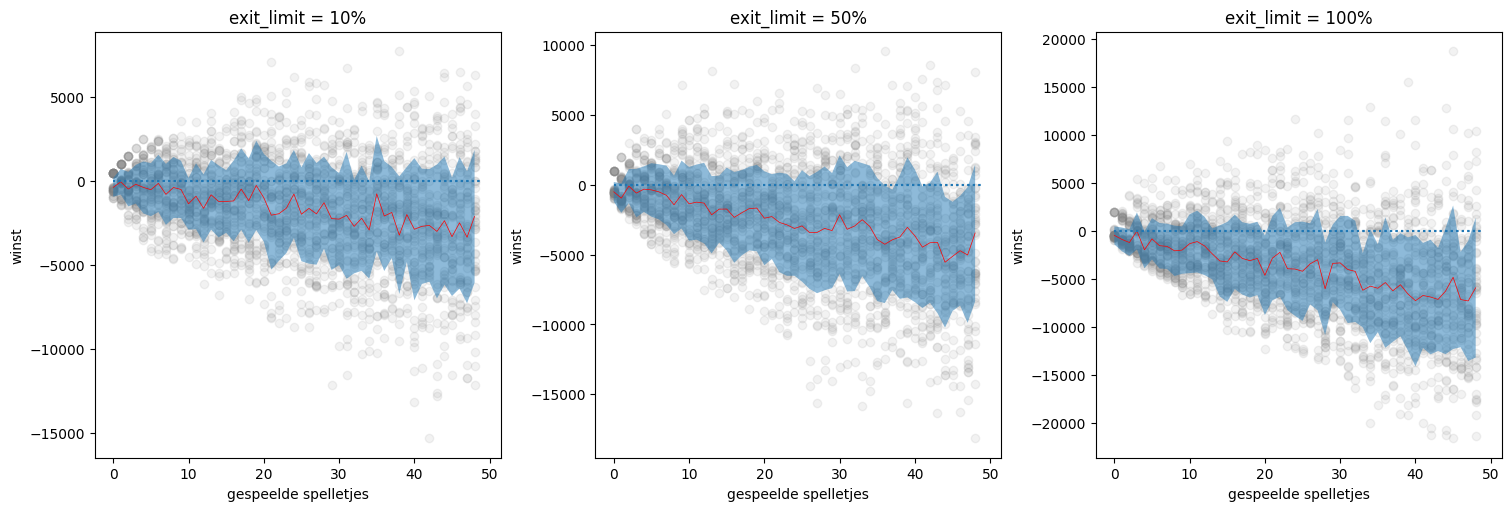

In [25]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,3, figsize = (15,5), constrained_layout = True)
for ax, simulation, wl in zip(axes, simulations, [1.1,1.5,2]):
    for s in simulation:
        ax.scatter(range(len(s)), s, c = "gray", alpha = 0.1)
    median = np.median(simulation, axis = 0)
    err = np.std(simulation, axis = 0)
    ax.plot(median, c = "r" , lw = 0.5, label = "Gemiddelde winst")
    ax.fill_between(range(len(err)), median-err, median+err, alpha = 0.5)
    ax.set_xlabel("gespeelde spelletjes")
    ax.set_ylabel("winst")
    ax.hlines([0, 0], 0, len(err), ls = ":")
    ax.set_title(f"exit_limit = {int(100*(wl-1))}%")
    # ax.set_ylim(-15000, 10000)

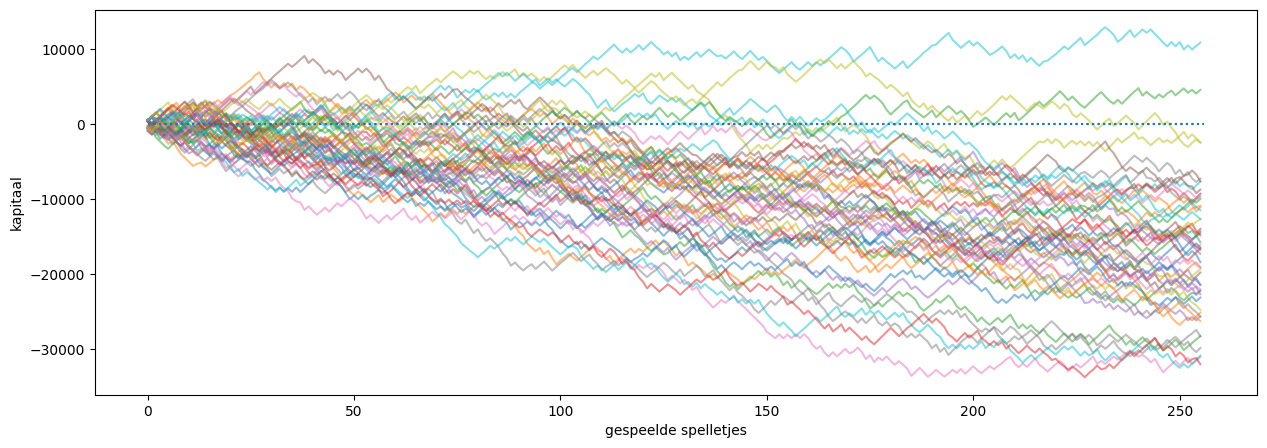

In [103]:
fig, ax = plt.subplots(figsize = (15,5))
for i in range(50):
    ax.plot(np.cumsum([game(win_limit = 10) for _ in range(256)], axis = 0), alpha = 0.5)
ax.set_xlabel("gespeelde spelletjes")
ax.set_ylabel("kapitaal")
ax.hlines([0,0], 0, 256, ls = ":")

In [67]:
np.max(simulation)

18740

In [12]:
50*50*1000

2500000

In [488]:
np.sum([game() for _ in range(50)])

1630